In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import joblib


In [3]:
df = pd.read_csv(r"C:\Users\Abhay\OneDrive\Desktop\Laptop\data\processed\laptop_price.csv")
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price(Rupee)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,124818
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,83753
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,53572
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,236412
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,168040


In [4]:
df.shape


(1275, 15)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price(Rupee)         1275 non-null   int64  
dtypes: float64(3), int64(2), object(10)
me

In [6]:
df.drop_duplicates(inplace=True)


In [7]:
df.columns = df.columns.str.lower().str.replace(" ", "_")


In [8]:
df.head()

,company,product,typename,inches,screenresolution,cpu_company,cpu_type,cpu_frequency_(ghz),ram_(gb),memory,gpu_company,gpu_type,opsys,weight_(kg),price(rupee)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,124818
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,83753
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,53572
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,236412
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,168040


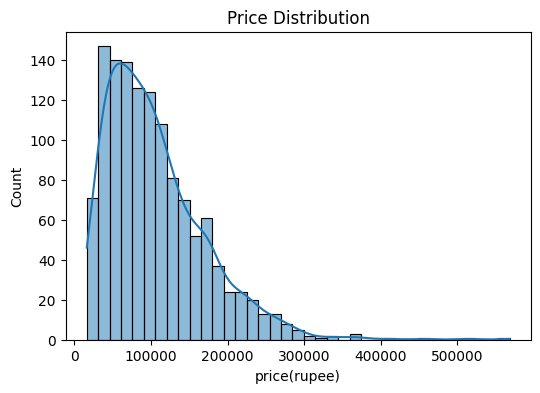

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df["price(rupee)"], kde=True)
plt.title("Price Distribution")
plt.show()


In [10]:
upper_limit = df["price(rupee)"].quantile(0.98)
df = df[df["price(rupee)"] <= upper_limit]

df["price(rupee)"].describe()


count      1249.000000
mean     101060.465172
std       56154.842826
min       16211.000000
25%       55808.000000
50%       91026.000000
75%      135840.000000
max      267301.000000
Name: price(rupee), dtype: float64

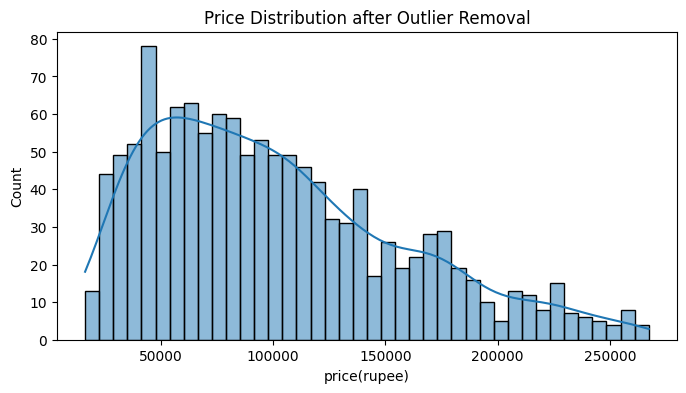

In [11]:
plt.figure(figsize=(8,4))
sns.histplot(df["price(rupee)"], bins=40, kde=True)
plt.title("Price Distribution after Outlier Removal")
plt.show()


In [12]:
df["price_log"] = np.log1p(df["price(rupee)"])


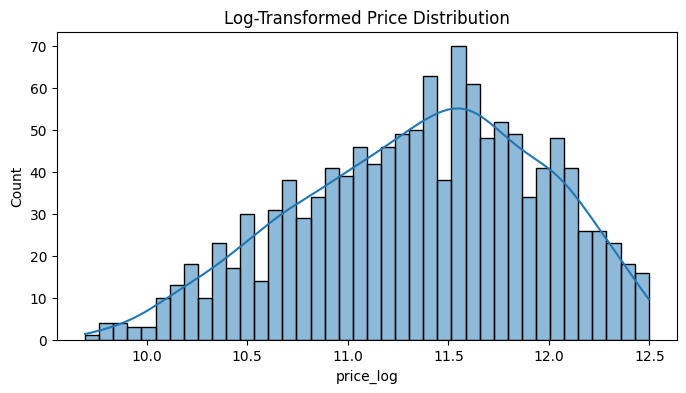

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(df["price_log"], bins=40, kde=True)
plt.title("Log-Transformed Price Distribution")
plt.show()


In [14]:
X = df.drop(["price(rupee)", "price_log"], axis=1)
y = df["price_log"]


In [15]:
categorical_cols = X.select_dtypes(include="object").columns.tolist()
numerical_cols = X.select_dtypes(exclude="object").columns.tolist()

categorical_cols, numerical_cols


(['company',
  'product',
  'typename',
  'screenresolution',
  'cpu_company',
  'cpu_type',
  'memory',
  'gpu_company',
  'gpu_type',
  'opsys'],
 ['inches', 'cpu_frequency_(ghz)', 'ram_(gb)', 'weight_(kg)'])

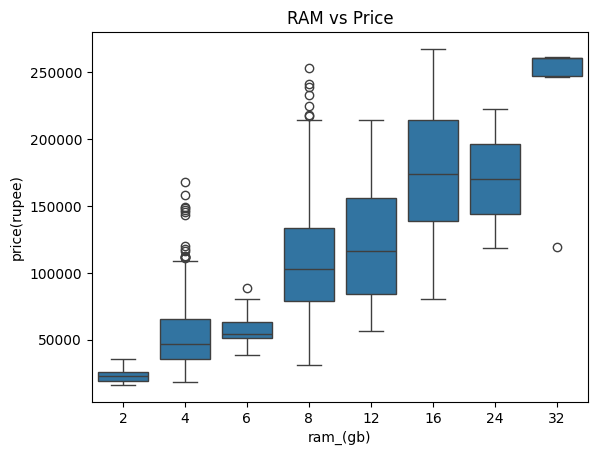

In [16]:
sns.boxplot(x="ram_(gb)", y="price(rupee)", data=df)
plt.title("RAM vs Price")
plt.show()


In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numerical_cols)
    ]
)


In [18]:
model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)


In [19]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['company', 'product',
                                                   'typename',
                                                   'screenresolution',
                                                   'cpu_company', 'cpu_type',
                                                   'memory', 'gpu_company',
                                                   'gpu_type', 'opsys']),
                                                 ('num', 'passthrough',
                                                  ['inches',
                                                   'cpu_frequency_(ghz)',
                                                   'ram_(gb)',
                                                   'weight_(kg)'])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.05, n_estimators=300,
                                           random_state=42))])

In [22]:
y_pred_log = pipeline.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred_log))
print("RMSE (log):", np.sqrt(mean_squared_error(y_test, y_pred_log)))


R2 Score: 0.8868404590881446
RMSE (log): 0.2021448593768252


In [23]:
y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(y_pred_log)

print("RMSE (₹):", np.sqrt(mean_squared_error(y_test_real, y_pred_real)))


RMSE (₹): 22386.041859003093


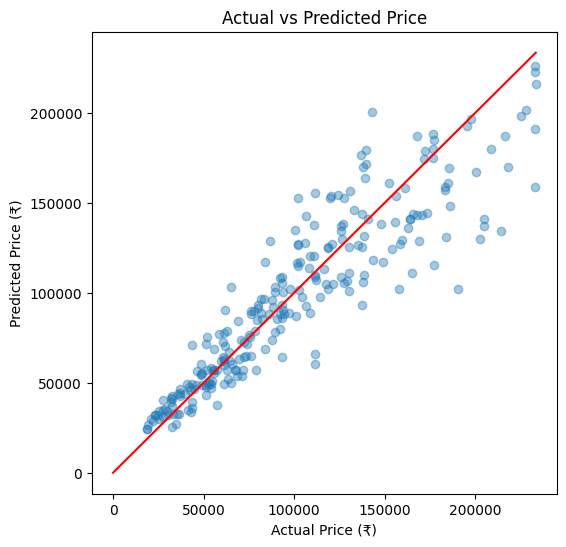

In [24]:
plt.figure(figsize=(6,6))
plt.scatter(y_test_real, y_pred_real, alpha=0.4)
plt.plot([0, max(y_test_real)], [0, max(y_test_real)], color="red")
plt.xlabel("Actual Price (₹)")
plt.ylabel("Predicted Price (₹)")
plt.title("Actual vs Predicted Price")
plt.show()


In [25]:
models = {
    "Linear Regression": LinearRegression(),
    
    "Random Forest": RandomForestRegressor(
        n_estimators=300,
        max_depth=15,
        min_samples_split=10,
        random_state=42,
        n_jobs=-1
    ),
    
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    )
}


In [26]:
results = []

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    pipeline.fit(X_train, y_train)
    
    y_pred_log = pipeline.predict(X_test)
    y_pred_real = np.expm1(y_pred_log)
    y_test_real = np.expm1(y_test)
    
    r2 = r2_score(y_test, y_pred_log)
    rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
    
    results.append({
        "Model": name,
        "R2 (log space)": round(r2, 4),
        "RMSE (₹)": round(rmse, 2)
    })

results_df = pd.DataFrame(results)
results_df


,Model,R2 (log space),RMSE (₹)
0,Linear Regression,0.8416,25505.60
1,Random Forest,0.8845,21952.76
2,Gradient Boosting,0.8868,22386.04


In [27]:
results_df.sort_values("RMSE (₹)")


,Model,R2 (log space),RMSE (₹)
1,Random Forest,0.8845,21952.76
2,Gradient Boosting,0.8868,22386.04
0,Linear Regression,0.8416,25505.60


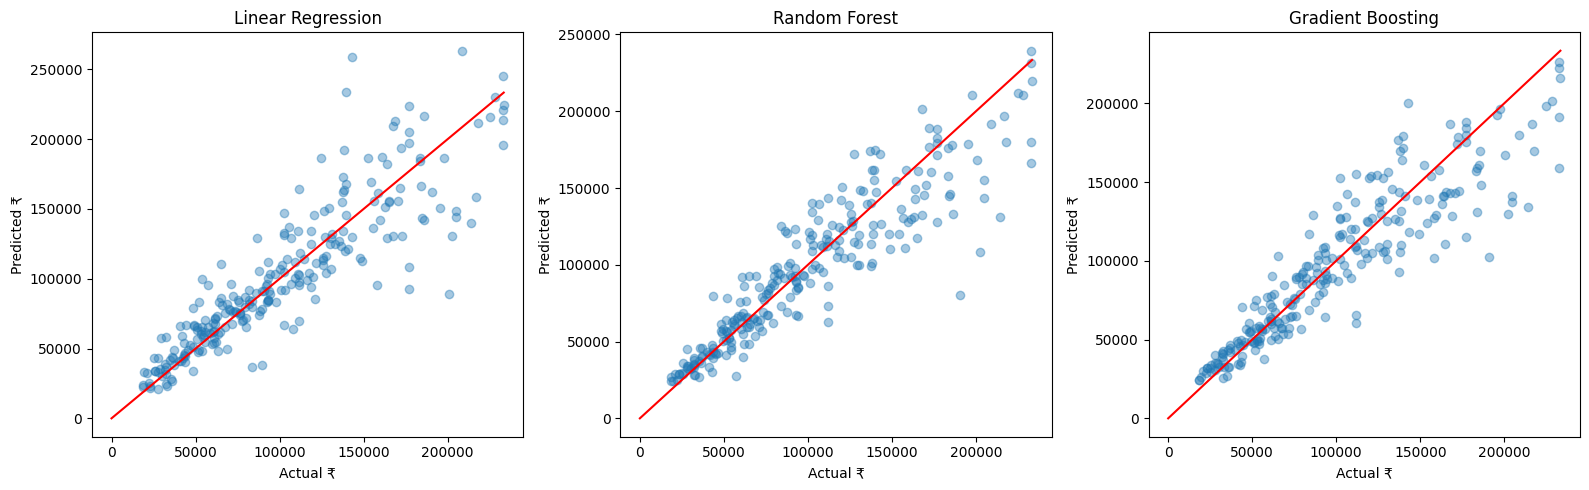

In [28]:
plt.figure(figsize=(16,5))

for i, (name, model) in enumerate(models.items()):
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    pipeline.fit(X_train, y_train)
    
    y_pred_real = np.expm1(pipeline.predict(X_test))
    
    plt.subplot(1, 3, i+1)
    plt.scatter(y_test_real, y_pred_real, alpha=0.4)
    plt.plot(
        [0, max(y_test_real)],
        [0, max(y_test_real)],
        color="red"
    )
    plt.title(name)
    plt.xlabel("Actual ₹")
    plt.ylabel("Predicted ₹")

plt.tight_layout()
plt.show()
